<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

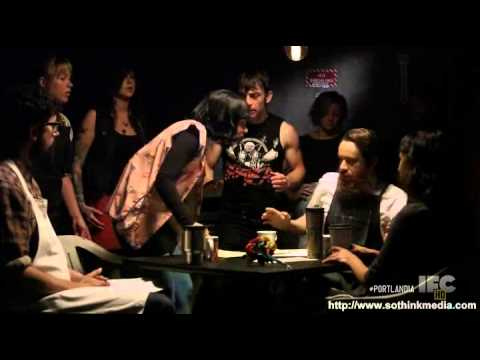

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
# Command for full current path
%pwd

'C:\\Users\\John\\Lambda\\Unit_4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import pandas as pd
import re
import spacy
from spacy.tokenizer import Tokenizer
from collections import Counter
import seaborn as sns

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [59]:
shops = pd.read_csv(url)

def wrangle(df):
    
    
    import re
    
    #Star rating to float
    df['star_rating'] = df['star_rating'].str.replace(' star rating', '').astype(float)
    
    #Take out dates and datetime them
    df['date'] = df['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")
    df['date'] = pd.to_datetime(df['date'])
    df['full_review_text'] = df['full_review_text'].str.replace('(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)', '')
    
    df['checkins'] = df['full_review_text'].str.extract(r"(\d{1,3}\s\D{5}-\w\w)")
    df['checkins'].fillna(value=0, inplace=True)
    
    df['full_review_text_clean'] = df['full_review_text'].str.replace("(\d{1,3}\s\D{5}-\w\w)", '')
    
    df['full_review_text_clean'] = df['full_review_text_clean'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
    
    STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'i', 'coffee', 'it', "it's", 'it.', 'the', 'this', 'good', 'like'])
    
    tokens = []

    for doc in tokenizer.pipe(df['full_review_text_clean'], batch_size=500):

        doc_tokens = []

        for token in doc: 
            if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False):
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens

    
    
    return df

shops = wrangle(shops)
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,checkins,full_review_text_clean,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,2016-11-25,1 check-in,Love love loved the atmosphere Every corner...,"[love, love, loved, atmosphere, corner, shop, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,2016-12-02,0,Listed in Date Night Austin Ambiance in Aust...,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,2016-11-30,1 check-in,Listed in Brunch Spots I loved the eclectic...,"[listed, brunch, spots, loved, eclectic, homey..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,2016-11-25,0,Very cool decor Good drinks Nice seating Ho...,"[cool, decor, drinks, nice, seating, overprice..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,2016-12-03,1 check-in,They are located within the Northcross mall...,"[located, northcross, mall, shopping, center, ..."


In [106]:
shops.groupby('coffee_shop_name').mean()

,star_rating
coffee_shop_name,
Alta’s Cafe,3.930000
Anderson’s Coffee Company,4.620000
Apanas Coffee & Beer,4.580882
Arturo’s Underground Cafe,4.300000
Bennu Coffee,4.130000
Brian’s Brew,4.844444
Cafe Ruckus,4.426471
Caffe Medici,4.040000
Caffé Medici,4.174825


In [60]:
df = shops.query("coffee_shop_name == 'Strange Brew, Austin Coffee '")
df.head()

,coffee_shop_name,full_review_text,star_rating,date,checkins,full_review_text_clean,tokens
6372,"Strange Brew, Austin Coffee","1 check-in With great coffee drinks, google ...",4.0,2016-09-30,1 check-in,With great coffee drinks google fiber inter...,"[great, drinks, google, fiber, internet, plent..."
6373,"Strange Brew, Austin Coffee",I've been here twice to work. The coffee is...,2.0,2016-10-09,0,Ive been here twice to work The coffee isnt...,"[ive, twice, work, isnt, bad, plenty, parking,..."
6374,"Strange Brew, Austin Coffee","Whether you're there to study, hang out, or ...",5.0,2016-07-26,0,Whether youre there to study hang out or lis...,"[youre, study, hang, listen, live, music, cove..."
6375,"Strange Brew, Austin Coffee",One of the staff scolded and embarrassed thi...,1.0,2016-11-22,0,One of the staff scolded and embarrassed thi...,"[staff, scolded, embarrassed, guy, sitting, lo..."
6376,"Strange Brew, Austin Coffee",1 check-in Reviewing from the coffee house a...,2.0,2016-07-19,1 check-in,Reviewing from the coffee house aspect I ca...,"[reviewing, house, aspect, came, work, dogs, g..."


In [15]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))


    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])


    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc
    
wc = count(df['tokens'])

In [16]:
wc = wc[(wc['appears_in_pct'] >= 0.025) & (wc['appears_in_pct'] <= 0.9)]

C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


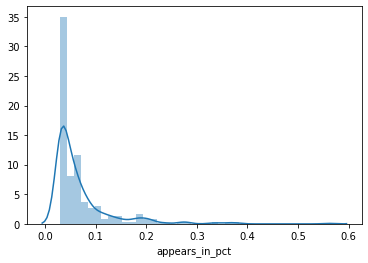

In [17]:
sns.distplot(wc['appears_in_pct'])

In [18]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,need,11,12,60.0,0.002238,0.295599,0.11
1,receipt,4,5,196.0,0.000932,0.491981,0.04
2,drinks,15,20,34.0,0.003730,0.221186,0.15
3,open,19,26,22.0,0.004849,0.169340,0.19
4,great,36,51,6.0,0.009511,0.071429,0.36


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

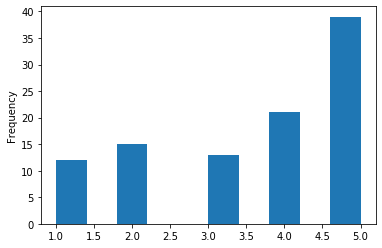

In [21]:
df['star_rating'].plot(kind='hist')

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [26]:
good = df[df['star_rating'] >= 4]
bad = df[df['star_rating'] < 2]

good_wc = count(good['tokens'])
bad_wc = count(bad['tokens'])

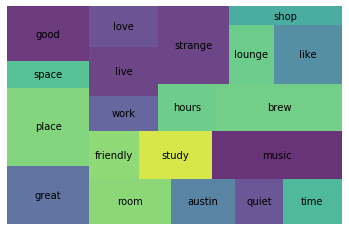

In [24]:
import squarify
import matplotlib.pyplot as plt
good_wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

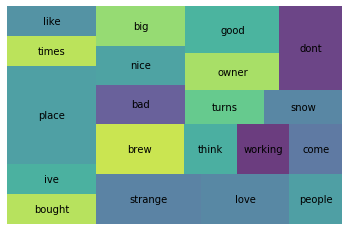

In [27]:
bad_wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=bad_wc_top20['pct_total'], label=bad_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [62]:
good = shops[shops['star_rating'] >= 4]
bad = shops[shops['star_rating'] < 2]

good_wc = count(good['tokens'])
bad_wc = count(bad['tokens'])

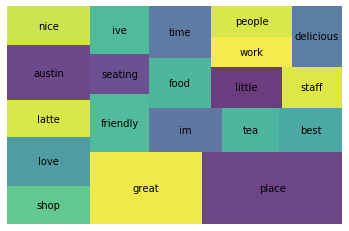

In [63]:
good_wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

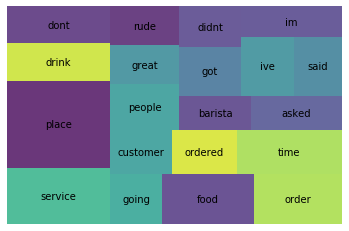

In [64]:
bad_wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=bad_wc_top20['pct_total'], label=bad_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [61]:
weird_words = ['snow']

for index,text in df['tokens'].iteritems():
    if 'snow' in text:
        print(df['full_review_text'].loc[index], df['star_rating'].loc[index])

  The owner or the guy who counts the tilt is a jerk.  The jerk slams his fist on the table and say"hey buddy you can't sleep here". Okay my bad. Turns out I asked the guys behind the counter what the big deal was with my eyes closed for a minute. Turns out this elite owner group comes in here often to harass people and little kids. The barista was telling me a kid bought a snow cone across the street, came in with his mom to get her coffee, and these social elite egos kicked the kid out for having a snow cone with him. Oh an the owner of the snow cone place is the one who made the big fuss plus it turns out he was once a part owner in this coffee spot. I guess it's called Strange Brew because of the strange people who own it.  1.0
  44 check-ins My wife and I love coming here! I love the regular cold brew and my wife loves the frozen mocha with coffee. The pastries here are awesome! I just wished they would have fried pickles LOL oh and the snow cone trailer outside is awesome too!!  

In [53]:
df.loc[6372]

coffee_shop_name                         Strange Brew, Austin Coffee 
full_review_text       With great coffee drinks google fiber inter...
star_rating                                                         4
date                                              2016-09-30 00:00:00
checkins                                                   1 check-in
tokens              [great, drinks, google, fiber, internet, plent...
Name: 6372, dtype: object

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

